In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# reading the dataset

data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# let's check the shape of the dataset
data.shape

(7501, 20)

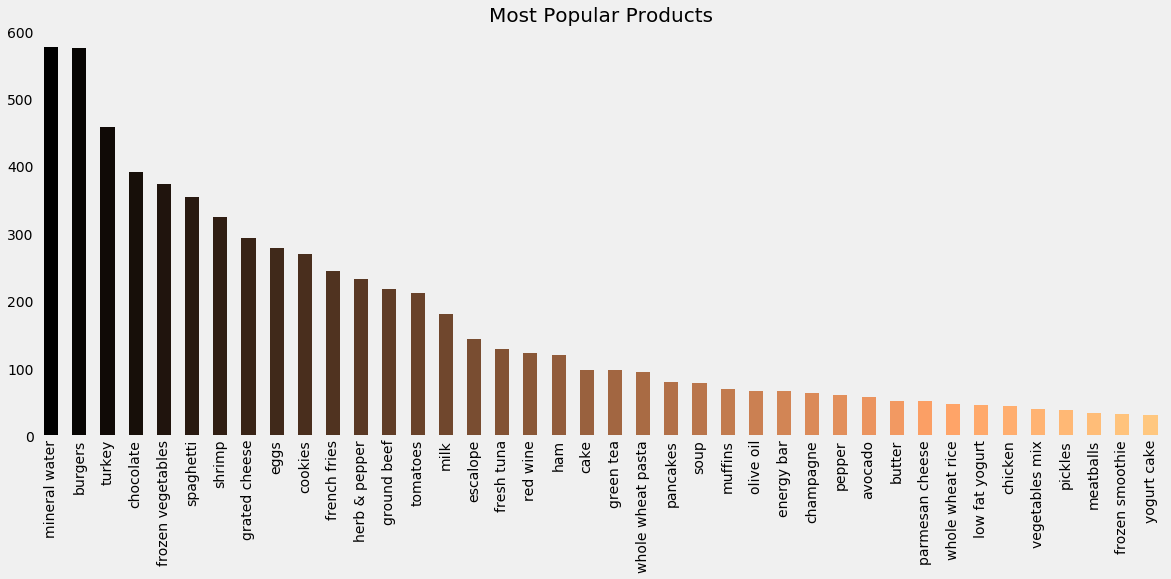

In [3]:
# Given the data above something that would be very interesting to show is:
# Which products are the most popular ones? For this lets use a bar graph an color based on the frequency

# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Products', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
#This is where it gets interesting we want to know. we want to understand which products perform better with
# other products. For this let's first prep the data

In [4]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [5]:
#Now we need to create a metrix to see which products where bought in a given transaction for this we will use
# Transaction enconder. TransactionEncoder learns the unique labels in the dataset, and via the transform method
# it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array:


te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
Now before we continue we need to understand how apriori works
The apriori algorithm generates association rules by using frequent itemsets. 
Its principle is simple – the subset of a frequent itemset would also be a frequent itemset. 
An itemset that has a support value greater than a threshold value is a frequent itemset.

There are 3 important measures to keep in mind when we work with apriori:
    1.Support. 
    This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears
    2. Confidence. 
    This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. 
    This is measured by the proportion of transactions with item X, in which item Y also appears
    3.  Lift. 
    This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is

In [6]:
#Now let's make our life easier by focusing on the top 10 products.
data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies']]

In [7]:
#Now let's say that we want to see which products sell better with which products
# we want to get all item sets that are bigger than 2
frequent_itemsets = apriori(data, min_support=0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))
frequent_itemsets.head(20)


,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [8]:
#Now let see which products sell better in pairs. This can lead to understand a mix and match to create mpromos etc.
frequent_itemsets[ (frequent_itemsets['length'] == 2)]

,support,itemsets,length
10,0.024397,"(burgers, mineral water)",2
11,0.019197,"(turkey, mineral water)",2
12,0.052660,"(chocolate, mineral water)",2
13,0.035729,"(frozen vegetables, mineral water)",2
14,0.059725,"(spaghetti, mineral water)",2
15,0.023597,"(shrimp, mineral water)",2
16,0.017464,"(grated cheese, mineral water)",2
17,0.050927,"(eggs, mineral water)",2
18,0.007466,"(cookies, mineral water)",2
19,0.010665,"(burgers, turkey)",2


In [9]:
#No that we know which products perform better with one another then we can answer which products have a better 
# performance when we mix them up with other products. In
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(50)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
1,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
2,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1.288075,0.004293,1.099093
3,(mineral water),(turkey),0.238368,0.062525,0.019197,0.080537,1.288075,0.004293,1.019590
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
6,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
7,(mineral water),(frozen vegetables),0.238368,0.095321,0.035729,0.149888,1.572463,0.013007,1.064189
8,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
9,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
